In [1]:
import json
import re 
import numpy as np

In [2]:

game1_score_company = {'B': {'B1': 10, 'B2': 15, 'B3': 29, 'B4': 40} ,\
                 'C': {'C1': 12, 'C2': 8, 'C3': 4, 'C4': 0}, \
                 'E': {'E1': 0, 'E2': 23, 'E3': 17}, \
                 'A': {'A1': 17, 'A2': 5, 'A3': 9}, \
                 'D': {'D1': 8, 'D2': 6, 'D3': 4, 'D4': 2, 'D5': 0}, \
                'min': 60}

game1_score_bank = {'B': {'B1': 10, 'B2': 26, 'B3': 40, 'B4': 10} ,\
              'C': {'C1': 0, 'C2': 15, 'C3': 20, 'C4': 25}, \
              'E': {'E1': 7, 'E2': 0, 'E3': 4}, \
              'A': {'A1': 0, 'A2': 9, 'A3': 13}, \
              'D': {'D1': 0, 'D2': 9, 'D3': 11, 'D4': 13, 'D5': 15}, \
                'min': 60}

game1_score_env = {'B': {'B1': 11, 'B2': 9, 'B3': 5, 'B4': 0} ,\
             'C': {'C1': 0, 'C2': 10, 'C3': 29, 'C4': 40}, \
             'E': {'E1': 2, 'E2': 5, 'E3': 9}, \
             'A': {'A1': 0, 'A2': 20, 'A3': 25}, \
             'D': {'D1': 0, 'D2': 9, 'D3': 11, 'D4': 13, 'D5': 15}, \
                'min': 60}


game1_score_community = {'B': {'B1': 10, 'B2': 8, 'B3': 2, 'B4': 0} ,\
                 'C': {'C1': 0, 'C2': 5, 'C3': 15, 'C4': 9}, \
                 'E': {'E1': 0, 'E2': 0, 'E3': 0}, \
                 'A': {'A1': 0, 'A2': 45, 'A3': 25}, \
                 'D': {'D1': 0, 'D2': 15, 'D3': 20, 'D4': 25, 'D5': 30}, \
                'min': 47}


game1_score_tourism = {'B': {'B1': 10, 'B2': 20, 'B3': 25, 'B4': 30} ,\
                 'C': {'C1': 0, 'C2': 14, 'C3': 7, 'C4': 0}, \
                 'E': {'E1': 10, 'E2': 5, 'E3': 17}, \
                 'A': {'A1': 30, 'A2': 0, 'A3': 25}, \
                 'D': {'D1': 0, 'D2': 9, 'D3': 5, 'D4': 2, 'D5': 0}, \
                'min': 57}

game1_score_construction = {'B': {'B1': 10, 'B2': 15, 'B3': 29, 'B4': 40}  ,\
                 'C': {'C1': 6, 'C2': 10, 'C3': 2, 'C4': 0}, \
                 'E': {'E1': 0, 'E2': 22, 'E3': 15}, \
                 'A': {'A1': 15, 'A2': 22, 'A3': 5}, \
                 'D': {'D1': 0, 'D2': 6, 'D3': 4, 'D4': 2, 'D5': 0}, \
                'min': 57}



game1_parties = {'company': game1_score_company, 'bank': game1_score_bank, 'tourism': game1_score_tourism,  "env": game1_score_env, 'construction': game1_score_construction, 'community': game1_score_community}

In [3]:
issue1_options = list(game1_score_company['A'].keys())
issue2_options = list(game1_score_company['B'].keys())
issue3_options = list(game1_score_company['C'].keys())
issue4_options = list(game1_score_company['D'].keys())
issue5_options = list(game1_score_company['E'].keys())

deals= []
def get_all_deals():
    global deals
    stack_ = []
    for issue1_option in issue1_options:
        stack_.append(issue1_option)
        for issue2_option in issue2_options:
            stack_.append(issue2_option)
            for issue3_option in issue3_options:
                stack_.append(issue3_option)
                for issue4_option in issue4_options:
                    stack_.append(issue4_option) 
                    for issue5_option in issue5_options:
                        deals.append(stack_ + [issue5_option])
                    stack_.pop()
                stack_.pop()
            stack_.pop()
        stack_.pop()
get_all_deals()

In [4]:
len(deals)

720

In [5]:
def calculator(scores,deal):
    deal_sum = 0
    issues = ['A','B','C','D','E']
    for i,issue in enumerate(deal):
        deal_sum += scores[issues[i]][issue]
    return deal_sum 

In [6]:
possible_deals = 0 
possible_deals_all = 0 

possible_per_party = {i:0 for i in game1_parties.keys()}

veto_parties = ['company','bank']
deals_5way = []
deals_6way = []

for deal in deals:
    agree = []
    veto_covered = [False for i in range(len(veto_parties))]
    for party in game1_parties.keys():
        deal_score = calculator(game1_parties[party], deal)
        if deal_score >= game1_parties[party]['min']:
            agree.append(party)
            if party in veto_parties: veto_covered[veto_parties.index(party)] = True 
    if len(agree) >= 5 and all(veto_covered):
        possible_deals += 1
        deals_5way.append(deal)
        for party in agree: possible_per_party[party] += 1
    if len(agree) == 6:
        possible_deals_all += 1
        deals_6way.append(deal)

print(possible_deals)
print(possible_deals_all)
print(possible_per_party)

57
21
{'company': 57, 'bank': 57, 'tourism': 47, 'env': 43, 'construction': 54, 'community': 48}


In [7]:
deals_6way

[['A2', 'B3', 'C3', 'D2', 'E3'],
 ['A3', 'B3', 'C2', 'D3', 'E3'],
 ['A3', 'B3', 'C2', 'D4', 'E3'],
 ['A3', 'B3', 'C2', 'D5', 'E2'],
 ['A3', 'B3', 'C2', 'D5', 'E3'],
 ['A3', 'B3', 'C3', 'D2', 'E2'],
 ['A3', 'B3', 'C3', 'D2', 'E3'],
 ['A3', 'B3', 'C3', 'D3', 'E2'],
 ['A3', 'B3', 'C3', 'D4', 'E2'],
 ['A3', 'B3', 'C3', 'D5', 'E2'],
 ['A3', 'B3', 'C4', 'D2', 'E2'],
 ['A3', 'B3', 'C4', 'D3', 'E2'],
 ['A3', 'B3', 'C4', 'D4', 'E2'],
 ['A3', 'B4', 'C3', 'D4', 'E3'],
 ['A3', 'B4', 'C3', 'D5', 'E3'],
 ['A3', 'B4', 'C4', 'D2', 'E3'],
 ['A3', 'B4', 'C4', 'D3', 'E3'],
 ['A3', 'B4', 'C4', 'D4', 'E2'],
 ['A3', 'B4', 'C4', 'D4', 'E3'],
 ['A3', 'B4', 'C4', 'D5', 'E2'],
 ['A3', 'B4', 'C4', 'D5', 'E3']]

In [8]:
deals_5way

[['A1', 'B2', 'C4', 'D2', 'E2'],
 ['A1', 'B3', 'C3', 'D5', 'E2'],
 ['A1', 'B3', 'C3', 'D5', 'E3'],
 ['A1', 'B3', 'C4', 'D2', 'E3'],
 ['A1', 'B3', 'C4', 'D3', 'E2'],
 ['A1', 'B3', 'C4', 'D3', 'E3'],
 ['A1', 'B3', 'C4', 'D4', 'E2'],
 ['A1', 'B3', 'C4', 'D4', 'E3'],
 ['A1', 'B3', 'C4', 'D5', 'E2'],
 ['A1', 'B3', 'C4', 'D5', 'E3'],
 ['A2', 'B3', 'C2', 'D2', 'E3'],
 ['A2', 'B3', 'C2', 'D3', 'E3'],
 ['A2', 'B3', 'C2', 'D4', 'E3'],
 ['A2', 'B3', 'C3', 'D1', 'E3'],
 ['A2', 'B3', 'C3', 'D2', 'E2'],
 ['A2', 'B3', 'C3', 'D2', 'E3'],
 ['A2', 'B3', 'C3', 'D3', 'E2'],
 ['A2', 'B3', 'C3', 'D4', 'E2'],
 ['A2', 'B3', 'C3', 'D5', 'E2'],
 ['A2', 'B3', 'C4', 'D1', 'E2'],
 ['A2', 'B3', 'C4', 'D2', 'E2'],
 ['A2', 'B3', 'C4', 'D3', 'E2'],
 ['A2', 'B4', 'C4', 'D4', 'E3'],
 ['A2', 'B4', 'C4', 'D5', 'E3'],
 ['A3', 'B2', 'C2', 'D2', 'E2'],
 ['A3', 'B3', 'C1', 'D3', 'E2'],
 ['A3', 'B3', 'C1', 'D3', 'E3'],
 ['A3', 'B3', 'C1', 'D4', 'E2'],
 ['A3', 'B3', 'C1', 'D4', 'E3'],
 ['A3', 'B3', 'C2', 'D2', 'E2'],
 ['A3', 'B

In [9]:
proposing_entity = "company"
deals_proposing_entity = {}
for deal in deals:
    proposing_entity_score = calculator(game1_parties[proposing_entity], deal)
    if proposing_entity_score >= game1_parties[proposing_entity]['min']:
        if not proposing_entity_score in deals_proposing_entity:
            deals_proposing_entity[proposing_entity_score] = {'deals':[], "agrees":[]}
        deals_proposing_entity[proposing_entity_score]["deals"].append(deal)
        agree = 0
        for entity in game1_parties.keys():
            if entity == proposing_entity: continue 
            other_entity_score = calculator(game1_parties[entity], deal)
            if other_entity_score >= game1_parties[entity]['min']: agree += 1
        deals_proposing_entity[proposing_entity_score]["agrees"].append(agree)

In [10]:
sorted_scores = list(deals_proposing_entity.keys())
sorted_scores.sort()
mean_agree = []
std_agree = []
max_agree = []
for score in sorted_scores:
    mean_agree.append(np.mean(deals_proposing_entity[score]["agrees"]))
    std_agree.append(np.std(deals_proposing_entity[score]["agrees"]))
    max_agree.append(max(deals_proposing_entity[score]["agrees"]))

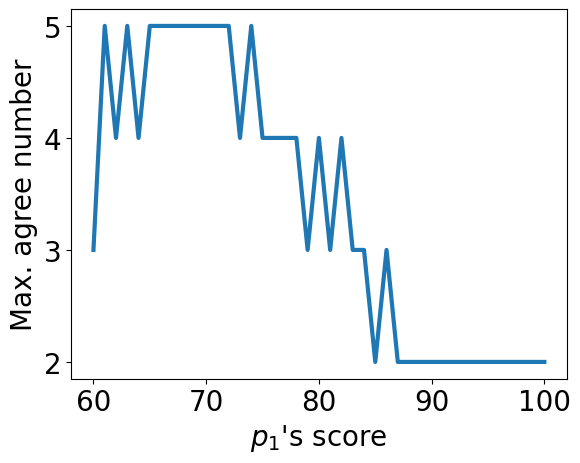

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rc('font', size=20)

x = sorted_scores

ax1 = plt.subplot(111)
ax1.plot(x, max_agree)

ax1.set_xlabel(r"$p_1$'s score")
ax1.set_ylabel('Max. agree number')

#savefig
plt.show()